In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Solving Differential Equations with Various Methods

dy/dt = t y^2
y(0) = 1

t0 = 0
y0 = 1

## Evaluate (if possible) the following

a) y(1.0): tau = 1.0, y1_est = 1.95589, y1_exact = 2.00000, error = 2.205
b) y(1.4): tau = 1.4, y1_est = 5.34635, y1_exact = 50.00000, error = 89.307
c) y(2.0): tau = 2.0, y1_est = 58.33333, y1_exact = -1.00000, error = -5933.333

The function y(t) has asymptotes at positive and negative sqrt(2), and 1.4 is very close to the sqrt(2), making it difficult to estimate y(1.4) using the Runge-Kutta method. The exact value of y(2.0) exists to the right of the positive asymptote, while the starting value y(0) exists to the left of that asymptote. The slope of y(t) is rapidly decreasing immediately to the left of the positive asymptote, and rapidly increasing immediately to the right of the positive asymptote. This makes it impossible to estimate y(2.0) using the Runge-Kutta method, since y(0) is to the left of the positive asymptote, and we use the rapidly decreasing slope of y(t).


In [30]:
# dy/dt = t*y^2
def f(y,t):
    return t*y**2

# solution from wolfram alpha for y(0)=1
# y = (-2) / (t^2 - 2)
def y(t):
    return (-2.0) / (t**2 - 2.0)

t0 = 0.0
y0 = y(t0)

# tau = 1.0
# tau = 1.4
tau = 2.0

In [31]:
# first order RK
y1 = y0 + tau*f(y0,t0)
print(f"First Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(t0+tau), np.abs(y1-y(t0+tau))*100/y(t0+tau)))

# second order RK
k1 = f(y0, t0)
k2 = f(y0 + tau * k1, t0 + tau)

y1 = y0 + tau * (k1 + k2) / 2.0
print(f"Second Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (
y1, y(t0 + tau), np.abs(y1 - y(t0 + tau)) * 100 / y(t0 + tau)))

# third order RK
k1 = f(y0, t0)
k2 = f(y0 + tau * k1 / 2.0, t0 + tau / 2.0)
k3 = f(y0 + tau * k2, t0 + tau)

y1 = y0 + tau * (k1 + 4 * k2 + k3) / 6.0
print(f"Third Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (
y1, y(t0 + tau), np.abs(y1 - y(t0 + tau)) * 100 / y(t0 + tau)))

# fourth order RK
k1 = f(y0,t0)
k2 = f(y0+tau*k1/2.0,t0+tau/2.0)
k3 = f(y0+tau*k2/2.0,t0+tau/2.0)
k4 = f(y0+tau*k3,t0+tau)
# print(k1, k2, k3, k4)

y1 = y0 + tau*(k1+2*k2+2*k3+k4)/6.0
print(f"Fourth Order RK: y1_est = %.5f, y1_exact = %.5f, error = %.3f" % (y1,y(t0+tau), np.abs(y1-y(t0+tau))*100/y(t0+tau)))

First Order RK: y1_est = 1.00000, y1_exact = -1.00000, error = -200.000
Second Order RK: y1_est = 3.00000, y1_exact = -1.00000, error = -400.000
Third Order RK: y1_est = 8.33333, y1_exact = -1.00000, error = -933.333
Fourth Order RK: y1_est = 58.33333, y1_exact = -1.00000, error = -5933.333


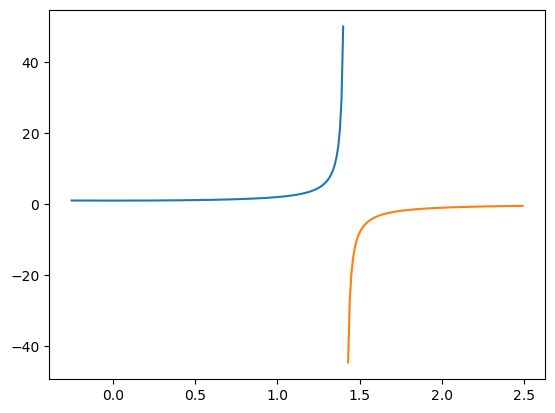

In [40]:
# plot y(t), asymptote at y = sqrt(2)
t_values1 = np.arange(-0.25, 1.41, 0.01)
t_values2 = np.arange(1.43, 2.5, 0.01)
y_values1 = np.array([y(i) for i in t_values1])
y_values2 = np.array([y(i) for i in t_values2])

plt.plot(t_values1, y_values1)
plt.plot(t_values2, y_values2)

Text(0, 0.5, 'y')

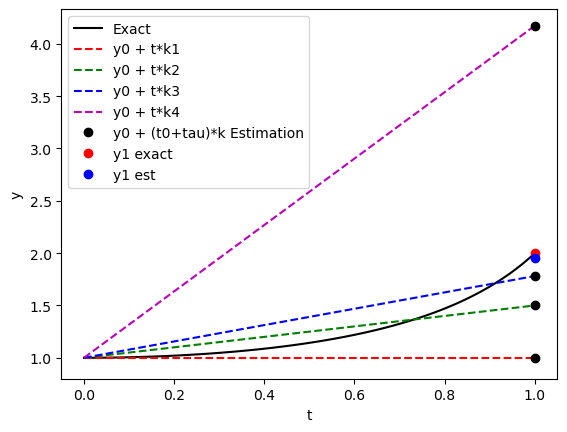

In [18]:
time = np.linspace(t0,t0+tau,100)
y_exact = y(time)

yk1 = y0 + time*k1
yk2 = y0 + time*k2
yk3 = y0 + time*k3
yk4 = y0 + time*k4

yk1pt = y0 + tau*k1
yk2pt = y0 + tau*k2
yk3pt = y0 + tau*k3
yk4pt = y0 + tau*k4
tau_array = np.array([t0+tau,t0+tau,t0+tau,t0+tau])
ypt_array = np.array([yk1pt,yk2pt,yk3pt,yk4pt])

tau_exact_pt = np.array([t0+tau])
y_exact_pt = np.array([y(t0+tau)])

tau_est_pt = np.array([t0+tau])
y_est_pt = np.array([y1])


plt.plot(time,y_exact,'k-',label='Exact')
plt.plot(time,yk1,'r--',label='y0 + t*k1')
plt.plot(time,yk2,'g--',label='y0 + t*k2')
plt.plot(time,yk3,'b--',label='y0 + t*k3')
plt.plot(time,yk4,'m--',label='y0 + t*k4')
plt.plot(tau_array,ypt_array,'ko',label='y0 + (t0+tau)*k Estimation')
plt.plot(tau_exact_pt,y_exact_pt,'ro',label='y1 exact')
plt.plot(tau_est_pt,y_est_pt,'bo',label='y1 est')
plt.ylim(0.8)

plt.legend()
plt.xlabel('t')
plt.ylabel('y')

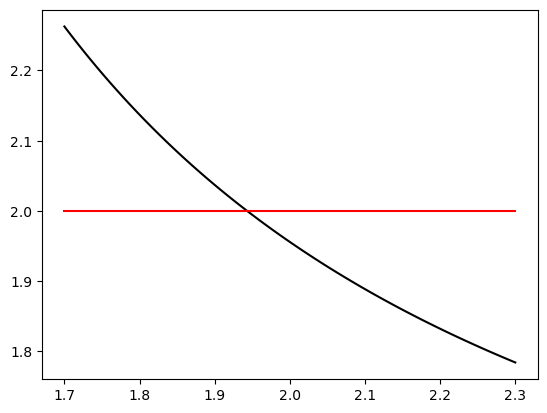

In [19]:
# Adaptive Step Size Fourth Order RK
divisor = np.linspace(1.7,2.3,100)

k1 = f(y0,t0)
k2 = f(y0+tau*k1/divisor,t0+tau/divisor)
k3 = f(y0+tau*k2/divisor,t0+tau/divisor)
k4 = f(y0+tau*k3,t0+tau)

y1 = y0 + tau*(k1+2*k2+2*k3+k4)/6.0

plt.plot(divisor,y1,'k-')
y_expected = [y(t0+tau) for div in divisor]
plt.plot(divisor,y_expected,'r-')

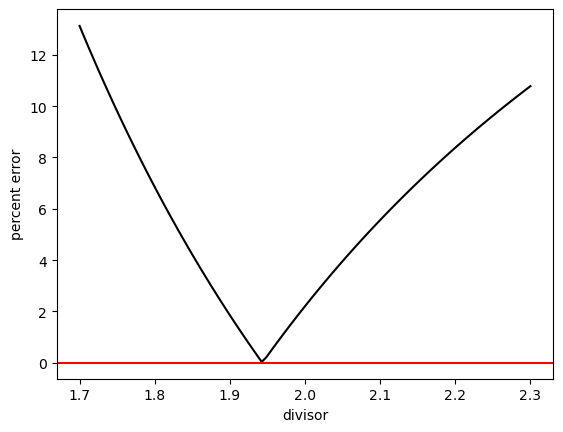

In [20]:
percent_error = np.abs(y1-y(t0+tau))*100/y(t0+tau)
plt.plot(divisor,percent_error,'k-')
plt.xlabel('divisor')
plt.ylabel('percent error')
plt.axhline(0.0,color='r')